In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

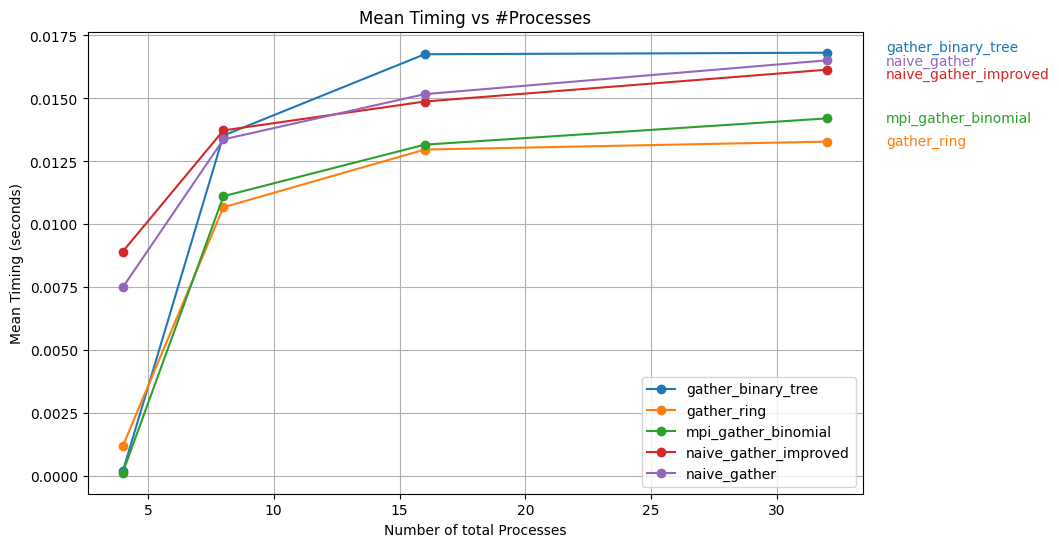

In [138]:
# Define the folder containing the CSV files
folder_path = './results/'

size = 25000

# Get a list of all files in the folder that contain '_weakscaling_{size}' in their name
files = sorted(file for file in os.listdir(folder_path) if f'_weakscaling_{size}.' in file)

# Create a dictionary to store the results and mean timings for each file
all_results = {}

# Loop through each file, read the data, calculate mean timings, and store them in the dictionary
for file in files:
    if 'linear_sync' in file:
        continue

    # Extract the plot name from the file name
    plot_name = file.split('_results')[0]
    
    # Read the CSV file
    file_path = os.path.join(folder_path, file)
    results = pd.read_csv(file_path, header=None)
    results.columns = ['Rep', 'NP', 'Size', 'Time']

    results = results[results['NP'] < 64]
    
    # Calculate mean timing for each NP group
    mean_results = results.groupby('NP')['Time'].mean().reset_index()
    
    # Store the results in the dictionary
    all_results[plot_name] = mean_results

# Plotting
plt.figure(figsize=(10, 6))

# Loop through the dictionary to plot each set of results and add legend
import matplotx

for plot_name, mean_results in all_results.items():
    plt.plot(mean_results['NP'], mean_results['Time'], marker='o', linestyle='-', label=plot_name)
matplotx.line_labels()  # line labels to the right

plt.title('Mean Timing vs #Processes')
plt.xlabel('Number of total Processes')
plt.ylabel('Mean Timing (seconds)')
plt.grid(True)
plt.legend()
plt.show()


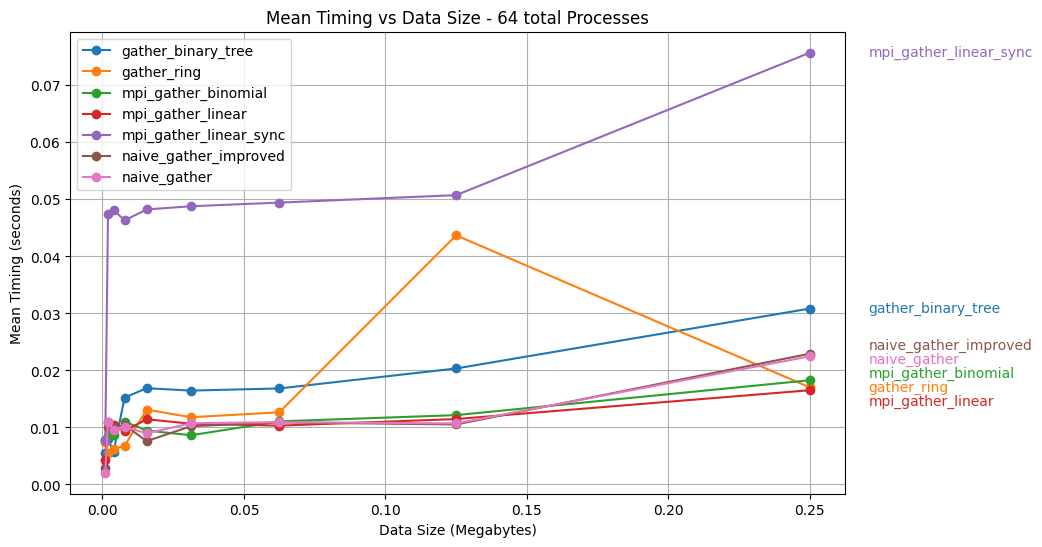

In [137]:
# Define the folder containing the CSV files
folder_path = './results/'
num_proc = 64

# Get a list of all files in the folder that contain '_strongscaling_' in their name
files_strong = sorted(file for file in os.listdir(folder_path) if f'_strongscaling_{num_proc}.' in file)

# Create a dictionary to store the results and mean timings for each file
all_results_strong = {}

# Loop through each file, read the data, calculate mean timings, and store them in the dictionary
for file_strong in files_strong:
    # Extract the plot name from the file name
    plot_name_strong = file_strong.split('_results')[0]
    
    # Read the CSV file
    file_path_strong = os.path.join(folder_path, file_strong)
    results_strong = pd.read_csv(file_path_strong, header=None)
    results_strong.columns = ['Rep', 'NP', 'Size', 'Time']

    results_strong = results_strong[results_strong['Size'] < 100000]
    
    # Calculate mean timing for each Size group
    mean_results_strong = results_strong.groupby('Size')['Time'].mean().reset_index()
    
    # Store the results in the dictionary
    all_results_strong[plot_name_strong] = mean_results_strong

# Plotting
plt.figure(figsize=(10, 6))

# Loop through the dictionary to plot each set of results and add legend
for plot_name_strong, mean_results_strong in all_results_strong.items():
    # Rescale x-axis values (multiply by 4 for bytes to megabytes)
    mean_results_strong['Size'] = mean_results_strong['Size'] * 4 / (1024 ** 2)
    plt.plot(mean_results_strong['Size'], mean_results_strong['Time'], marker='o', linestyle='-', label=plot_name_strong)
matplotx.line_labels()  # line labels to the right

plt.title(f'Mean Timing vs Data Size - {num_proc} total Processes')
plt.xlabel('Data Size (Megabytes)')
plt.ylabel('Mean Timing (seconds)')
plt.grid(True)
plt.legend()
plt.show()